In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
random.seed(42)
# Generate distances between cities
def generate_distances(num_cities):
    distances = np.random.randint(3, 51, (num_cities, num_cities))
    np.fill_diagonal(distances, 0)
    return distances

In [3]:
# ACO algorithm
def ACO(num_cities, num_ants, num_iterations, distances):
    # Initialize pheromone map
    pheromone_map = np.ones((num_cities, num_cities)) / num_cities
    best_path_length = float('inf')
    best_path = []

    for iteration in range(num_iterations):
        # Initialize ants
        ants = [[] for i in range(num_ants)]

        # Have ants travel and update pheromone map
        for ant in range(num_ants):
            visited_cities = set()
            current_city = random.randint(0, num_cities-1)
            visited_cities.add(current_city)
            ants[ant].append(current_city)

            # Have ant visit all cities
            for i in range(num_cities-1):
                # Choose next city based on pheromone levels
                unvisited_cities = set(range(num_cities)) - visited_cities
                pheromone_levels = [pheromone_map[current_city][j] for j in unvisited_cities]
                next_city = random.choices(list(unvisited_cities), weights=pheromone_levels, k=1)[0]

                # Update ant and visited cities
                ants[ant].append(next_city)
                visited_cities.add(next_city)
                current_city = next_city

            # Add path from last city to starting city
            ants[ant].append(ants[ant][0])

            # Update pheromone map
            path_length = sum([distances[ants[ant][i]][ants[ant][i+1]] for i in range(num_cities)])
            if path_length < best_path_length:
                best_path_length = path_length
                best_path = ants[ant]
            for i in range(num_cities):
                pheromone_map[ants[ant][i]][ants[ant][i+1]] += 1/path_length

        # Evaporate pheromone levels
        pheromone_map *= 0.5

        # Print results every 10 iterations
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: best path length = {best_path_length}")

    return best_path, best_path_length


In [4]:
# Generate distances for 10 and 20 cities
distances_10 = generate_distances(10)
distances_20 = generate_distances(20)

In [5]:
# Show the chosen distances between the cities in each given configuration
print("Distances for 10 cities:")
print(distances_10)

Distances for 10 cities:
[[ 0 18  3  8 37 20  4 43 24 48]
 [ 9  0 42 33  5  4  9 40 22 18]
 [43  4  0 13 50 26 17 26 43  9]
 [16 40  3  0 40  4 23 47 18 23]
 [36 45 19  5  0 24 32 34 19 18]
 [27 16 25 47 29  0 44 11 12 32]
 [ 6 14 42 31 36  6  0 25 45 50]
 [10 31 11  3 35 37 27  0 12 36]
 [23 45 26 27 25 45 18 38  0 40]
 [45 39 27  8 20 29 15 40 22  0]]


In [6]:
print("Distances for 20 cities:")
print(distances_20)

Distances for 20 cities:
[[ 0 38 21 25 14 13 46  5 48 39  5 19 29 23 21  6 44 10  5 17]
 [34  0 19 39 29 44 43 18 29  4 22 12 27 10 47 18 50 26 40 19]
 [44 32  0 26 41 31 28 34 35 17 29 10 21 49 19  3 15  4 22 49]
 [ 4 43 20  0 24 12 48 13 17 18  5 16 23  7 19 41 37 29 17  7]
 [44 29 36 39  0 36 39 50 43  4 28 15 21 28 44 34  6 43 10 15]
 [ 5 40 42  4  6  0 21 45 15  4 49 39 27 17 23  7  3 49 40 39]
 [35 48  7 12 24  5  0 31 20 40 22 34  8 13 26 42 43  6 40 27]
 [19  8 40 21  5 17 21  0 31 46 41 46  7 37 25 11 46 42 27  7]
 [28 35 32 14 49 36 45 14  0 23 43  6 15  9  4 34 17 43  3 10]
 [21 48 31 31  8 47 39 38  7  0 43  5 11 27  9 15 13 33 33 14]
 [12 43 29 15  6 33 12 21 26 19  0 49 22 37 38 13 33 11 28 24]
 [48  9  4 27 42 10 23 34 22 23 38  0 11 16 10 14 25 21 35  5]
 [46 12 19 20 14 19 33 40 38 28 45 37  0 20 43 42  4 44 40 19]
 [41 19 32 41 39  5  8 39 32  8 20 42 20  0 12 16 16 46 11 24]
 [12 10 40 38 23 49 15 35 48 11  7 30 16 24  0 19 25 38 24 14]
 [24 43 15 47  9  7 23 27 39 2

In [7]:
# Run ACO for 10 cities with different number of ants
num_cities = 10
num_ants_list = [1, 5, 10, 20]
num_iterations = 50
best_path_lengths_10 = []

for num_ants in num_ants_list:
    print(f"Running ACO for {num_ants} ants on {num_cities} cities...")
    best_path, best_path_length = ACO(num_cities, num_ants, num_iterations, distances_10)
    best_path_lengths_10.append(best_path_length)
    print(f"Best path found with {num_ants} ants: {best_path}. Length: {best_path_length}")

Running ACO for 1 ants on 10 cities...
Iteration 0: best path length = 253
Iteration 10: best path length = 212
Iteration 20: best path length = 212
Iteration 30: best path length = 212
Iteration 40: best path length = 212
Best path found with 1 ants: [3, 2, 6, 5, 8, 7, 1, 9, 0, 4, 3]. Length: 212
Running ACO for 5 ants on 10 cities...
Iteration 0: best path length = 201
Iteration 10: best path length = 121
Iteration 20: best path length = 118
Iteration 30: best path length = 118
Iteration 40: best path length = 118
Best path found with 5 ants: [8, 6, 5, 7, 3, 0, 2, 1, 9, 4, 8]. Length: 118
Running ACO for 10 ants on 10 cities...
Iteration 0: best path length = 148
Iteration 10: best path length = 143
Iteration 20: best path length = 143
Iteration 30: best path length = 131
Iteration 40: best path length = 131
Best path found with 10 ants: [9, 4, 8, 6, 7, 3, 5, 1, 0, 2, 9]. Length: 126
Running ACO for 20 ants on 10 cities...
Iteration 0: best path length = 184
Iteration 10: best path l

In [8]:
# Run ACO for 20 cities with different number of ants
num_cities = 20
num_ants_list = [1, 5, 10, 20]
num_iterations = 50
best_path_lengths_20 = []

for num_ants in num_ants_list:
    print(f"Running ACO for {num_ants} ants on {num_cities} cities...")
    best_path, best_path_length = ACO(num_cities, num_ants, num_iterations, distances_20)
    best_path_lengths_20.append(best_path_length)
    print(f"Best path found with {num_ants} ants: {best_path}. Length: {best_path_length}")


Running ACO for 1 ants on 20 cities...
Iteration 0: best path length = 568
Iteration 10: best path length = 392
Iteration 20: best path length = 391
Iteration 30: best path length = 391
Iteration 40: best path length = 391
Best path found with 1 ants: [17, 3, 12, 7, 4, 9, 6, 14, 0, 10, 8, 19, 18, 1, 5, 15, 13, 11, 2, 16, 17]. Length: 391
Running ACO for 5 ants on 20 cities...
Iteration 0: best path length = 468
Iteration 10: best path length = 396
Iteration 20: best path length = 384
Iteration 30: best path length = 360
Iteration 40: best path length = 357
Best path found with 5 ants: [12, 9, 7, 17, 3, 0, 2, 10, 15, 5, 4, 16, 11, 14, 6, 8, 18, 13, 19, 1, 12]. Length: 326
Running ACO for 10 ants on 20 cities...
Iteration 0: best path length = 401
Iteration 10: best path length = 374
Iteration 20: best path length = 329
Iteration 30: best path length = 307
Iteration 40: best path length = 284
Best path found with 10 ants: [15, 10, 6, 17, 3, 11, 13, 16, 5, 14, 7, 12, 4, 18, 8, 1, 9, 19, 0

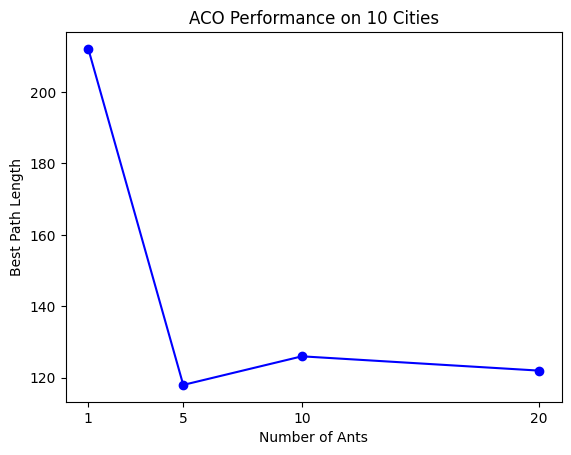

In [9]:
# Plot results for 10 cities
plt.plot(num_ants_list, best_path_lengths_10, 'bo-')
plt.title('ACO Performance on 10 Cities')
plt.xlabel('Number of Ants')
plt.ylabel('Best Path Length')
plt.xticks(num_ants_list)
plt.show()

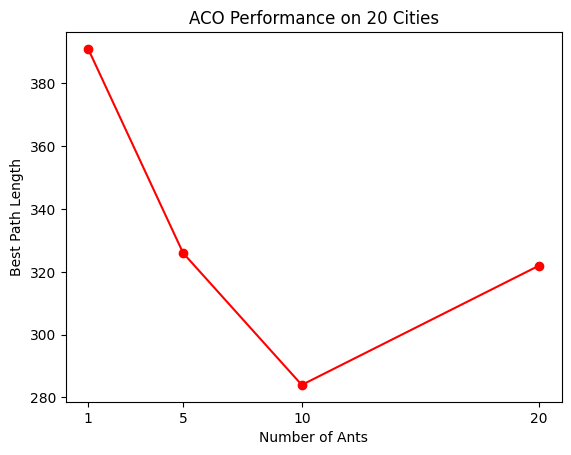

In [10]:
# Plot results for 20 cities
plt.plot(num_ants_list, best_path_lengths_20, 'ro-')
plt.title('ACO Performance on 20 Cities')
plt.xlabel('Number of Ants')
plt.ylabel('Best Path Length')
plt.xticks(num_ants_list)
plt.show()